In [12]:
from typing_extensions import TypedDict
import random
from typing import Literal
from IPython.display import Image,display
from langgraph.graph import StateGraph, START,END

In [5]:
class State(TypedDict):
    graph_info: str

In [23]:
def start_play(state:State):
    print ("Start_play node has been called")
    return {"graph_info": state["graph_info"] + "I am planing to play"}

def play_cricket(state:State):
    print("Cricket node has been called")
    return {"graph_info": state["graph_info"] + "Cricket"}

def play_badminton(state:State):
    print("Badminton node has been called")
    return {"graph_info": state["graph_info"] + "Badminton"}

In [24]:
def random_play(state:State)-> Literal["cricket", "badminton"]:
    graph_info = state["graph_info"]

    if random.random() < 0.5:
        return play_cricket()
    else:
        return play_badminton()

In [25]:
Graph = StateGraph(State)

In [26]:
Graph.add_node("Start_play", start_play)
Graph.add_node("cricket", play_cricket)
Graph.add_node("badminton", play_badminton)

In [27]:
Graph.add_edge(START,"Start_play")
Graph.add_conditional_edges("Start_play", random_play)
Graph.add_edge("cricket",END)
Graph.add_edge("badminton",END)

In [28]:
Graph_builder = Graph.compile()

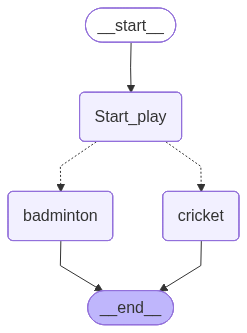

In [29]:
display(Image(Graph_builder.get_graph().draw_mermaid_png()))